In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'
myindex = [
    '0:00', '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
tragitti = tragitti[clean(tragitti)]

tragitti = tragitti[tragitti[distance_param] >= 2.]
bike_batte_car = tragitti[tragitti['Bike'] <= tragitti['Enjoy']][[distance_param, 'Month', 'Day', 'Hour', 'Minute', 'Public', 'Car']]
len(bike_batte_car)

17917

In [3]:
resume_on_distance = pd.crosstab(
    index=pd.cut(bike_batte_car[distance_param], bins=[2., 5., 7., 10.]),
    columns='Abs. freq.')

resume_on_distance.insert(1, '% sul tot.', (resume_on_distance['Abs. freq.'] / len(tragitti)).apply(lambda p: np.round(p, 3) * 100))
resume_on_distance

col_0,Abs. freq.,% sul tot.
CDistance,,
"(2.0, 5.0]",11120,22.4
"(5.0, 7.0]",5467,11.0
"(7.0, 10.0]",1284,2.6


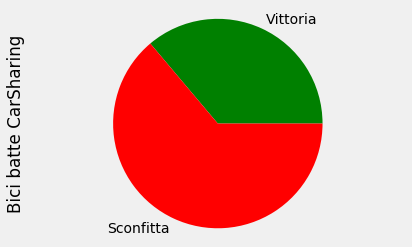

In [4]:
resume = pd.DataFrame(
    [len(bike_batte_car), len(tragitti) - len(bike_batte_car)],
    index=['Vittoria', 'Sconfitta'], columns=['Bici batte CarSharing'])
resume.plot.pie('Bici batte CarSharing', colors=['green', 'red'], legend=False)
plt.axis('equal')
plt.show()

In [5]:
resume.insert(1, '%', (resume['Bici batte CarSharing'] / len(tragitti)).apply(lambda p: np.round(p, 3) * 100))
resume

,Bici batte CarSharing,%
Vittoria,17917,36.2
Sconfitta,31643,63.8


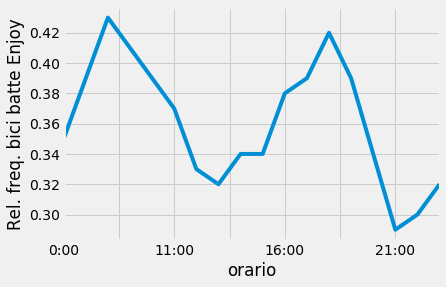

In [6]:
rel_freq = (bike_batte_car['Hour'].value_counts().sort_index() / tragitti['Hour'].value_counts().sort_index()) \
.apply(lambda x: np.round(x, 2))
       
rel_freq_df = pd.DataFrame(rel_freq.values, index=myindex)
rel_freq_df.plot(legend=False)
plt.xlabel('orario')
plt.ylabel('Rel. freq. bici batte Enjoy')
plt.show()